# **Data Undertanding**

**langkah-langkah data mining**
1. bisnis understanding
2. data understanding : tau outlier(data kotor),missing values
3. preprocecing : mengganti outlier dengan rata rata
4. modeling
5.evaluasi
6.deployement

# **Macam-macam data pada datamining**
**1.Berdasarkan Sifat Datanya**

1.   Data Numerik (Numerical Data): Data dalam bentuk angka yang dapat diolah secara matematis.
2.   Data Kategorikal (Categorical Data): Data dalam bentuk kategori atau label yang tidak memiliki nilai numerik.
3. Data Ordinal: Data yang memiliki urutan atau tingkatan, tetapi selisih antara nilainya tidak harus sama.
4. Data Boolean: Data yang hanya memiliki dua kemungkinan nilai (true/false atau 0/1).

**2. Berdasarkan Sumber Datanya**


1.   Data Terstruktur (Structured Data): Data yang tersimpan dalam format yang terorganisir, seperti tabel dalam database relasional.
2.   Data Semi-Terstruktur (Semi-Structured Data): Data yang tidak sepenuhnya terstruktur tetapi memiliki elemen yang bisa dikenali.
3. Data Tidak Terstruktur (Unstructured Data): Data yang tidak memiliki format baku dan sulit dimasukkan ke dalam tabel database.

**3. Berdasarkan Sumber Pengumpulan**


1.   Data Historis: Data yang dikumpulkan dari waktu sebelumnya untuk analisis tren atau prediksi.
2.   Data Real-Time: Data yang dikumpulkan dan dianalisis secara langsung saat terjadi.

**4. Berdasarkan Fungsinya dalam Data Mining**


1.   Data Training (Training Data): Data yang digunakan untuk melatih model machine learning.
2.   Data Uji (Testing Data): Data yang digunakan untuk menguji performa model yang telah dilatih.

3. Data Validasi (Validation Data): Data yang digunakan untuk menyempurnakan model sebelum digunakan pada data uji.










# **Langkah-Langkah menghubungkan database dbeaver ke aiven.io dan ditampilkan pada google colab**

**Langkah-Langkah :**

1. membuat akun aiven.io setelah itu membuat project untuk mysql dan postgresql
2. download dbeaver dan membuat database baru, hubungkan dengan project di aiven.io, hubungkan dengan menyeseuaikan (hostname,username,password,port).
3. import data pada database dbeaver yang sudah dibuat yaitu pada database mysql dan postgresql dengan cara import data menggunakan file csv yang sudah diberikan. pada sql membuat tabel terlebih dahulu dan menyesuaikan dengan file yang akan di upload pada kolom tabel, untuk postgreSQL tidak perlu membuat tabel.

In [1]:
# Langkah 3: Instal library yang diperlukan
# sqlalchemy: untuk membuat koneksi ke database
# pymysql: untuk koneksi ke database MySQL
# psycopg2-binary: untuk koneksi ke database PostgreSQL
!pip install sqlalchemy pymysql psycopg2-binary


Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Langkah 4: Import library yang diperlukan
import pandas as pd
from sqlalchemy import create_engine

ModuleNotFoundError: No module named 'pandas'

In [ ]:
# langkah 5 koneksi ke database untuk mengambil data
# Connection string untuk database MySQL
mysql_connection_str = "mysql+pymysql:///defaultdb"

# Connection string untuk database PostgreSQL
postgres_connection_str = "postgresql+psycopg2:///defaultdb"


In [ ]:
# langkah 6
from sqlalchemy import create_engine

# Membuat engine untuk MySQL
engine_mysql = create_engine(mysql_connection_str)

# Membuat engine untuk PostgreSQL
engine_postgres = create_engine(postgres_connection_str)


In [ ]:
# langkah 7 mengambil data dari tabel
import pandas as pd

query_mysql = "SELECT * FROM IRISMYSQL"  # Ganti nama tabel sesuai kebutuhan
query_postgres = "SELECT * FROM irispostgres"  # Ganti nama tabel sesuai kebutuhan

df_mysql = pd.read_sql(query_mysql, con=engine_mysql)
df_postgres = pd.read_sql(query_postgres, con=engine_postgres)


# **menggabungkan data dari 2 database berbeda**

In [ ]:
# langkah 8 menampilkan tabel yang sudah digabungkan
# Import library
import pandas as pd
from sqlalchemy import create_engine

engine_mysql = create_engine(mysql_connection_str)
engine_postgres = create_engine(postgres_connection_str)

# Ambil data dari masing-masing database
query_mysql = "SELECT * FROM IRISMYSQL"
query_postgres = "SELECT * FROM irispostgres"

df_mysql = pd.read_sql(query_mysql, con=engine_mysql)
df_postgres = pd.read_sql(query_postgres, con=engine_postgres)

# Pastikan nama kolom konsisten sebelum merge
df_mysql.rename(columns={'class': 'Class'}, inplace=True)

# Gabungkan data berdasarkan 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgres, on=["id", "Class"], how="outer", suffixes=('_mysql', '_postgres'))

# Tampilkan jumlah total baris
print(f"\n📊 Total Data Setelah Merge: {df_merged.shape[0]} baris, {df_merged.shape[1]} kolom\n")

# Styling tabel untuk tampilan lebih menarik
styled_table = df_merged.style.background_gradient(cmap='viridis')

# Tampilkan tabel dalam Jupyter Notebook atau Google Colab
display(styled_table)



📊 Total Data Setelah Merge: 150 baris, 6 kolom



,id,Class,petal_length,petal_width,sepal_length,sepal_width
0,1,Iris-setosa,86.400000,70.000000,20.100000,30.500000
1,2,Iris-setosa,1.400000,0.200000,4.900000,3.000000
2,3,Iris-setosa,1.300000,0.200000,4.700000,3.200000
3,4,Iris-setosa,1.500000,0.200000,4.600000,3.100000
4,5,Iris-setosa,1.400000,0.200000,5.000000,3.600000
5,6,Iris-setosa,1.700000,0.400000,5.400000,3.900000
6,7,Iris-setosa,1.400000,0.300000,4.600000,3.400000
7,8,Iris-setosa,1.500000,0.200000,5.000000,3.400000
8,9,Iris-setosa,1.400000,0.200000,4.400000,2.900000
9,10,Iris-setosa,1.500000,0.100000,4.900000,3.100000


# **Menampilkan Statistik**

In [ ]:
# langkah 9 menghitung dan menampilkan statistik
import pandas as pd

# Hitung statistik deskriptif
stats = df_merged.describe()

# Styling tabel statistik deskriptif
styled_stats = stats.style.background_gradient(cmap='viridis')

# Tampilkan
print("Statistik Deskriptif:")
display(styled_stats)


Statistik Deskriptif:


,id,petal_length,petal_width,sepal_length,sepal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,4.325333,1.664000,5.943333,3.234000
std,43.445368,6.970563,5.668070,1.426895,2.282464
min,1.000000,1.000000,0.100000,4.300000,2.000000
25%,38.250000,1.600000,0.300000,5.100000,2.800000
50%,75.500000,4.400000,1.300000,5.800000,3.000000
75%,112.750000,5.100000,1.800000,6.400000,3.300000
max,150.000000,86.400000,70.000000,20.100000,30.500000


In [ ]:
# langkah 10 Menghitung median hanya untuk kolom numerik
print("\nMedian per kolom numerik:")
median_values = df_merged.select_dtypes(include=['number']).median()

# Mengubah Series median menjadi DataFrame untuk styling
median_df = median_values.to_frame(name='Median')

# Styling tabel median menggunakan background_gradient
styled_median = median_df.style.background_gradient(cmap='viridis')

# Tampilkan tabel median dengan styling
from IPython.display import display
display(styled_median)


Median per kolom numerik:


,Median
id,75.500000
petal_length,4.400000
petal_width,1.300000
sepal_length,5.800000
sepal_width,3.000000


# **Menampilkan Fitur-Fitur seperti pada orange**

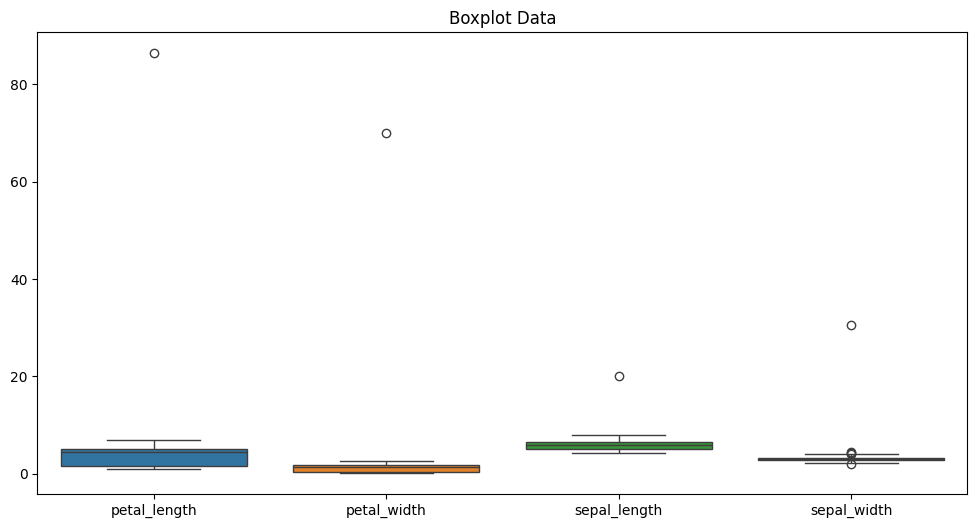

In [ ]:
# fitur boxplot
# langkah 11 Boxplot untuk melihat distribusi data per kolom
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_merged[['petal_length', 'petal_width', 'sepal_length', 'sepal_width']])
plt.title("Boxplot Data")
plt.show()

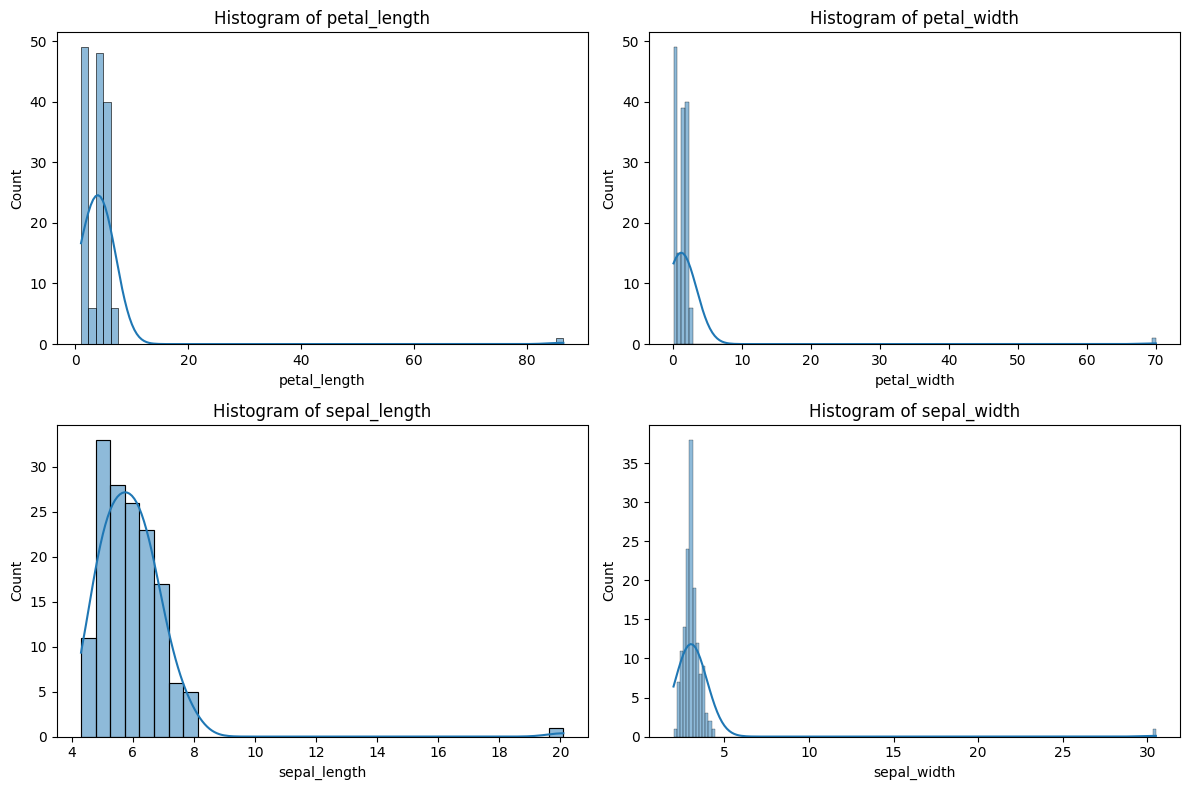

In [ ]:
# Fitur histogram
#langkah 12 menampilkan histogram untuk masing-masing kolom
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
columns = ['petal_length', 'petal_width', 'sepal_length', 'sepal_width']
for ax, col in zip(axes.flatten(), columns):
    sns.histplot(df_merged[col], kde=True, ax=ax)
    ax.set_title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

In [ ]:
# langkah 13 menampilkan pivot table ranking
import pandas as pd

# Buat pivot table untuk menghitung rata-rata petal_length per Class
pivot_table = pd.pivot_table(
    df_merged,
    values='petal_length',  # Nilai yang dihitung rata-ratanya
    index='Class',          # Kelompok berdasarkan Class
    aggfunc='mean'          # Fungsi agregasi: mean
)

# Urutkan pivot table berdasarkan nilai petal_length secara menurun
pivot_table = pivot_table.sort_values(by='petal_length', ascending=False)

# Tambahkan kolom peringkat (rank) berdasarkan nilai petal_length
pivot_table['Rank'] = pivot_table['petal_length'].rank(method='dense', ascending=False).astype(int)

# Reset index agar kolom Class muncul sebagai kolom biasa
pivot_table = pivot_table.reset_index()

# Styling untuk tampilan yang lebih menarik
styled_pivot_table = pivot_table.style.background_gradient(cmap='plasma') \
    .set_caption("📊 Pivot Table dengan Ranking") \
    .set_properties(**{'text-align': 'center'}) \
    .format({'petal_length': "{:.2f}"})  # Format angka menjadi 2 desimal

# Tampilkan Pivot Table
display(styled_pivot_table)


,Class,petal_length,Rank
0,Iris-virginica,5.55,1
1,Iris-versicolor,4.26,2
2,Iris-setosa,3.16,3


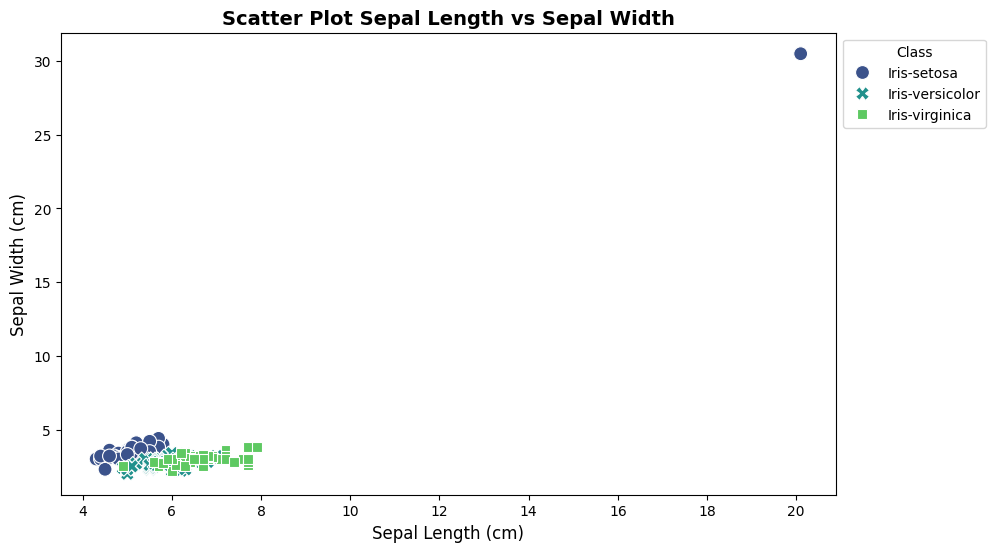

In [ ]:
# fitur scatter plot
# langkah 14 menampilkan scetter plot
import matplotlib.pyplot as plt
import seaborn as sns

# Set ukuran figure
plt.figure(figsize=(10, 6))

# Scatter plot menggunakan seaborn
sns.scatterplot(
    data=df_merged,
    x="sepal_length",
    y="sepal_width",
    hue="Class",
    style="Class",
    palette="viridis",
    s=100  # Ukuran titik
)

# Tambahkan judul dan label sumbu
plt.title("Scatter Plot Sepal Length vs Sepal Width", fontsize=14, fontweight="bold")
plt.xlabel("Sepal Length (cm)", fontsize=12)
plt.ylabel("Sepal Width (cm)", fontsize=12)

# Tambahkan legend di lokasi terbaik
plt.legend(title="Class", bbox_to_anchor=(1, 1), loc="upper left")

# Tampilkan plot
plt.show()


In [ ]:
# langkah 15 menampilkan statistik lengkap
import pandas as pd
from IPython.display import display

# Pilih hanya kolom numerik
numerical_columns = df_merged.select_dtypes(include=['number'])

# Hitung statistik deskriptif dasar
stats = numerical_columns.describe().T  # Transpose agar lebih rapi

# Tambahkan statistik tambahan
stats['Median'] = numerical_columns.median()
stats['Mode'] = numerical_columns.mode().iloc[0]  # Mode bisa lebih dari satu, ambil yang pertama
stats['Variance'] = numerical_columns.var()
stats['Missing Values'] = numerical_columns.isnull().sum()

# Styling tabel statistik deskriptif
styled_stats = stats.style.background_gradient(cmap='coolwarm')\
                        .set_table_attributes("style='width:80%;'")\
                        .set_caption("📊 Statistik Deskriptif Lengkap")\
                        .format(precision=2)  # Menampilkan 2 angka di belakang koma

# Tampilkan tabel statistik deskriptif
display(styled_stats)


,count,mean,std,min,25%,50%,75%,max,Median,Mode,Variance,Missing Values
id,150.00,75.50,43.45,1.00,38.25,75.50,112.75,150.00,75.50,1.00,1887.50,0
petal_length,150.00,4.33,6.97,1.00,1.60,4.40,5.10,86.40,4.40,1.50,48.59,0
petal_width,150.00,1.66,5.67,0.10,0.30,1.30,1.80,70.00,1.30,0.20,32.13,0
sepal_length,150.00,5.94,1.43,4.30,5.10,5.80,6.40,20.10,5.80,5.00,2.04,0
sepal_width,150.00,3.23,2.28,2.00,2.80,3.00,3.30,30.50,3.00,3.00,5.21,0


# **Menemukan Outlier (Data Kotor)**

# 1. KNN (k-nearest neighbor )


KNN (k-nearest neighbor ): bisa digunakan untuk menebak label dan menebak kelas digunakan untuk menemukan outlier juga, Tujuan dari algoritma k-nearest neighbor adalah untuk mengidentifikasi tetangga terdekat dari titik kueri yang diberikan, sehingga kita dapat menetapkan label kelas ke titik tersebut.
    *   klasifikasi kalo label itu tidak angka (yang ditebak adalah class)
    *   regresi data label atau class adalah angka (yang ditebak adalah angka)

**Langkah-Langkah KNN**


1.   Hitung jarak antara data baru dan semua data dalam dataset
2.   pilih K tetangga terdekat
3. untuk klasifikasi : Ambil mayoritas kelas dari K tetangga
4. untuk regresi : Ambil rata-rata nilai dari K tetangga.


**jenis-jenis metrik jarak**

1.   Euclidean Distance :Menghitung jarak lurus (garis terpendek) antara dua titik dalam ruang Euclidean.
2.   Manhattan Distance : Menghitung jarak antara dua titik dengan hanya bergerak secara horizontal dan vertikal (seperti perjalanan taksi di kota dengan jalan berbentuk grid).
3.   Minkowski Distance

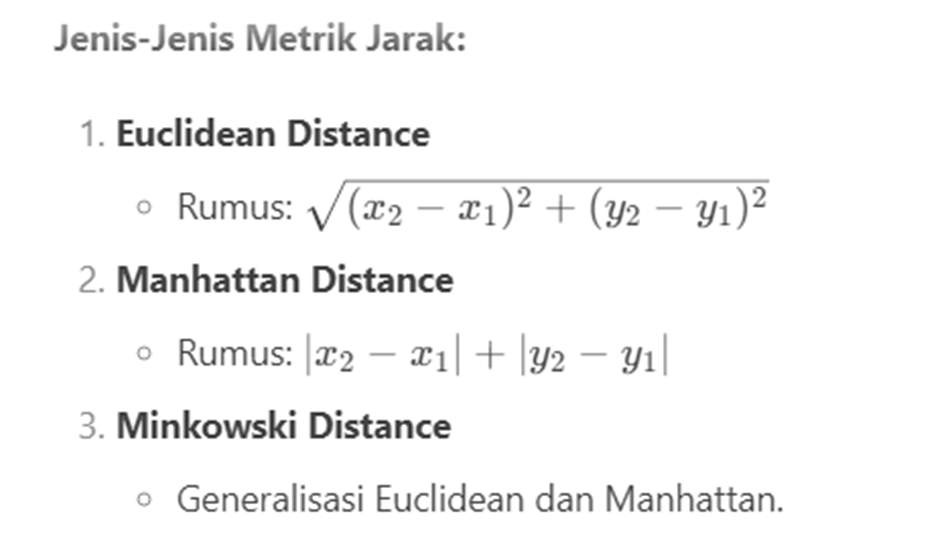



# Implementasi perhitungan Manual KNN menggunakan euclidean Distance

**Penjelasan :**

1.   data yang sudah dihitung pada excel di impor ke dbeaver
2.   disimpan pada database postgreSQL di aiven.io
3. data ditampilkan



In [ ]:
# Langkah 1: Menampilkan data perhitungan manual Euclidean Distance dan ranknya
# Import library
import pandas as pd
from sqlalchemy import create_engine

# 🔹 Koneksi ke database PostgreSQL
postgres_connection_str = "postgresql+psycopg2:///defaultdb"
engine_postgres = create_engine(postgres_connection_str)

# 🔹 Ambil data dari tabel datahitung di PostgreSQL
query_postgres = "SELECT * FROM datahitung"
df_postgres = pd.read_sql(query_postgres, con=engine_postgres)

# 🔹 Tampilkan jumlah total baris
print(f"\n📊 Total Data: {df_postgres.shape[0]} baris, {df_postgres.shape[1]} kolom\n")

# 🔹 Styling tabel untuk tampilan lebih menarik
styled_table = df_postgres.style.background_gradient(cmap='viridis')

# 🔹 Tampilkan tabel dalam Jupyter Notebook atau Google Colab
display(styled_table)



📊 Total Data: 150 baris, 8 kolom



,id,Class,petal_length,petal_width,sepal_length,sepal_width,EUCLEDIAN,RANK
0,1,Iris-setosa,"86,4",70,"20,1","30,5","114,3867562",11
1,2,Iris-setosa,"1,4","0,2","4,9",3,"114,4399406",10
2,3,Iris-setosa,"1,3","0,2","4,7","3,2","114,3287365",15
3,4,Iris-setosa,"1,5","0,2","4,6","3,1","114,2307314",20
4,5,Iris-setosa,"1,4","0,2",5,"3,6","113,7624718",44
5,6,Iris-setosa,"1,7","0,4","5,4","3,9","114,2705124",16
6,7,Iris-setosa,"1,4","0,3","4,6","3,4","114,2036339",22
7,8,Iris-setosa,"1,5","0,2",5,"3,4","114,4783386",7
8,9,Iris-setosa,"1,4","0,2","4,4","2,9","114,3495518",10
9,10,Iris-setosa,"1,5","0,1","4,9","3,1","114,0805856",26


In [ ]:
# langkah 2 menemukan outlier ekstreme pada data
# 📌 Import library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import NearestNeighbors  # Model KNN untuk mendeteksi outlier

# Pilih hanya kolom numerik dari data yang telah digabungkan (df_merged)
numerical_columns = df_merged.select_dtypes(include=[np.number]).columns

# Periksa apakah ada kolom numerik dalam dataset
if len(numerical_columns) == 0:
    print("⚠ Tidak ada kolom numerik untuk dianalisis.")
else:
    # Ambil hanya nilai numerik dari dataset untuk analisis outlier
    X = df_merged[numerical_columns].values

    # Tangani nilai NaN dengan menggantinya menggunakan nilai median dari setiap kolom
    X = np.nan_to_num(X, nan=np.nanmedian(X))

    # Tentukan jumlah tetangga (k) berdasarkan aturan umum: k = akar jumlah data
    k = max(3, int(np.sqrt(len(X))))  # Minimal k=3 untuk memastikan stabilitas perhitungan

    # Latih model KNN dan cari k tetangga terdekat untuk setiap data
    nbrs = NearestNeighbors(n_neighbors=k+1).fit(X)
    distances, indices = nbrs.kneighbors(X)

    # Ambil rata-rata jarak dari k tetangga terdekat (mengabaikan titik data itu sendiri)
    avg_distances = distances[:, 1:].mean(axis=1)

    # Tentukan threshold untuk mendeteksi outlier menggunakan persentil 99.5
    #    Semakin tinggi persentil, semakin ketat deteksi outlier
    threshold = np.percentile(avg_distances, 99.5)

    # Temukan indeks data yang memiliki rata-rata jarak lebih besar dari threshold
    outliers = np.where(avg_distances > threshold)[0]

    # Tampilkan hasil jumlah outlier yang ditemukan
    print(f"📌 Total outliers ditemukan: {len(outliers)}\n")

    # Jika ada outlier, tampilkan indeks dan data outlier
    if len(outliers) > 0:
        print("Indeks Outliers:", outliers)
        print("\n🔍 Data Outliers:")
        display(df_merged.iloc[outliers])  # Gunakan display agar tampilan lebih rapi di Jupyter Notebook

    # Visualisasi outlier hanya jika data memiliki 2 fitur numerik (agar bisa digambarkan dalam 2D)
    if X.shape[1] == 2:
        plt.figure(figsize=(8,6))
        plt.scatter(X[:, 0], X[:, 1], label="Normal Data", alpha=0.6)  # Data normal
        plt.scatter(X[outliers, 0], X[outliers, 1], color='red', label="Outlier", edgecolors='k', s=100)  # Data outlier
        plt.xlabel(numerical_columns[0])
        plt.ylabel(numerical_columns[1])
        plt.title("Outlier Detection using KNN")
        plt.legend()
        plt.show()


📌 Total outliers ditemukan: 1

Indeks Outliers: [0]

🔍 Data Outliers:


,id,Class,petal_length,petal_width,sepal_length,sepal_width
0,1,Iris-setosa,86.4,70.0,20.1,30.5


**Proses Penghitungan Outlier**


1.   Mengambil Data Numerik
2.   Menentukan Tetangga Terdekat (k-nearest neighbors) :
Jumlah k dipilih menggunakan aturan minimal 3 dan maksimal adalah akar dari jumlah data, Ini berarti setiap titik data akan dibandingkan dengan k tetangga terdekatnya.

3. Menghitung Jarak ke Tetangga Terdekat : Untuk setiap titik data, dihitung jarak ke k tetangga terdekatnya.
Jarak dihitung menggunakan metrik Euclidean (default pada NearestNeighbors).

4. Menghitung Rata-rata Jarak ke k Tetangga Terdekat : Dari semua jarak yang dihitung, diambil rata-rata jarak ke k tetangga terdekat (kecuali diri sendiri).
Ini memberikan gambaran seberapa jauh titik data dari kelompoknya.
5. Menentukan Threshold untuk Outlier : Threshold ditentukan menggunakan persentil 99.5 dari distribusi jarak rata-rata.
Artinya, hanya 0.5% data dengan jarak tertinggi yang dianggap sebagai outlier.
6. Jika jarak rata-rata suatu titik lebih besar dari threshold, maka titik tersebut dianggap sebagai outlier.

**Kenapa Outlier Dihitung Berdasarkan Jarak?**
1. Data yang jauh dari kelompoknya akan memiliki rata-rata jarak lebih tinggi ke tetangga terdekatnya.
2. Data yang terisolasi atau tidak memiliki banyak tetangga dekat juga akan memiliki rata-rata jarak lebih tinggi.
3. Dengan menggunakan persentil, kita hanya mengambil sebagian kecil data yang benar-benar memiliki jarak ekstrem.





# 2. LOF  (Local Outlier Factor)


**LOF (Local Outlier Factor)** adalah algoritma yang digunakan untuk mendeteksi outlier dalam suatu dataset dengan membandingkan kerapatan lokal suatu titik data dengan tetangganya. LOF membantu mengidentifikasi titik-titik yang memiliki kepadatan berbeda secara signifikan dibandingkan dengan titik-titik di sekitarnya.

**Cara Kerja LOF**

1.   Menentukan Tetangga Terdekat
(k-nearest neighbors).
*   Untuk setiap titik dalam dataset, algoritma menentukan sejumlah k
tetangga terdekatnya berdasarkan jarak (misalnya, menggunakan jarak Euclidean).

2.   Menghitung Jarak dan Kepadatan Lokal


*   Dihitung jarak jangkauan (reachability distance) dari suatu titik ke tetangganya.
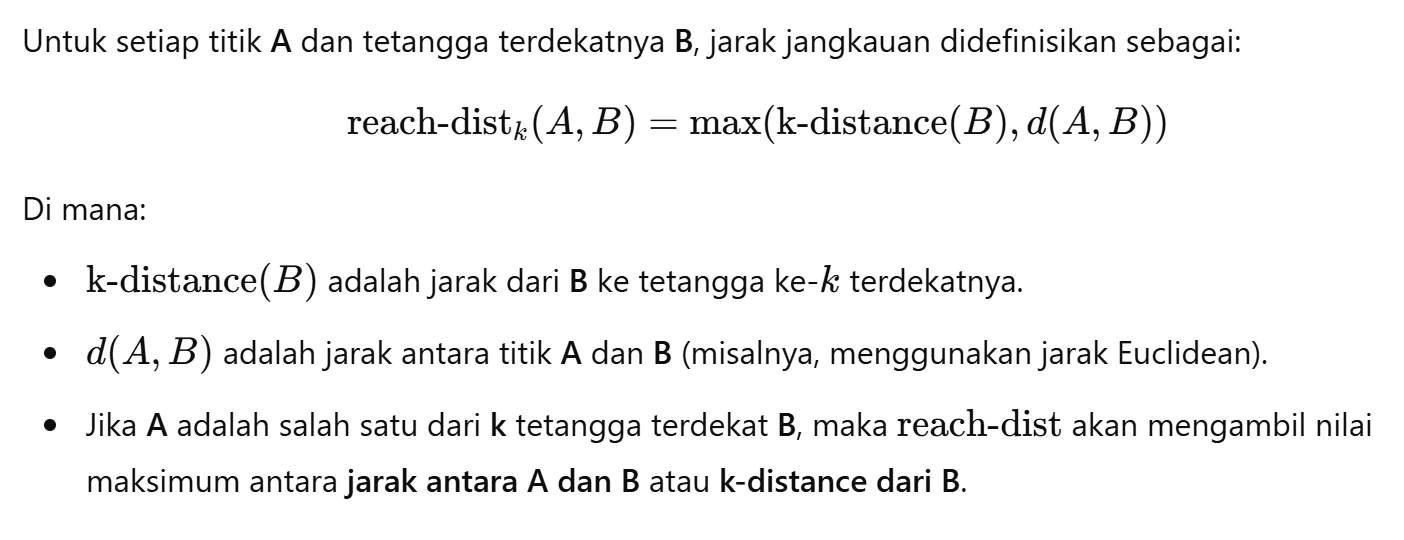
*  Dihitung kepadatan lokal (local reachability density - LRD) dengan membandingkan rata-rata jarak jangkauan suatu titik dengan tetangganya.
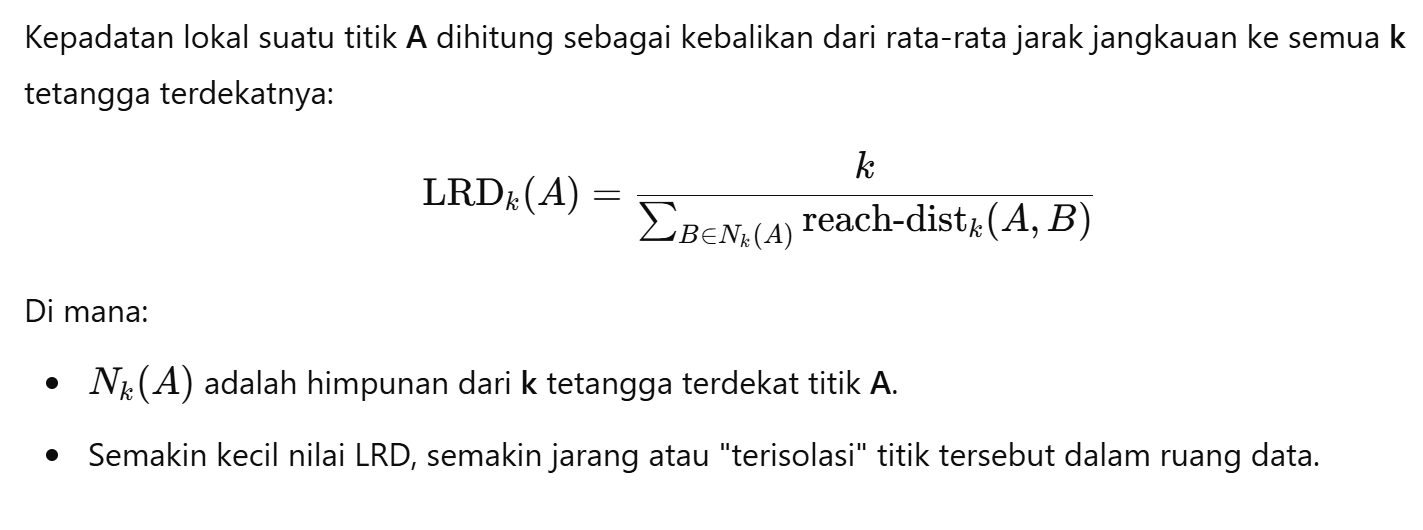


3. Menghitung LOF Score

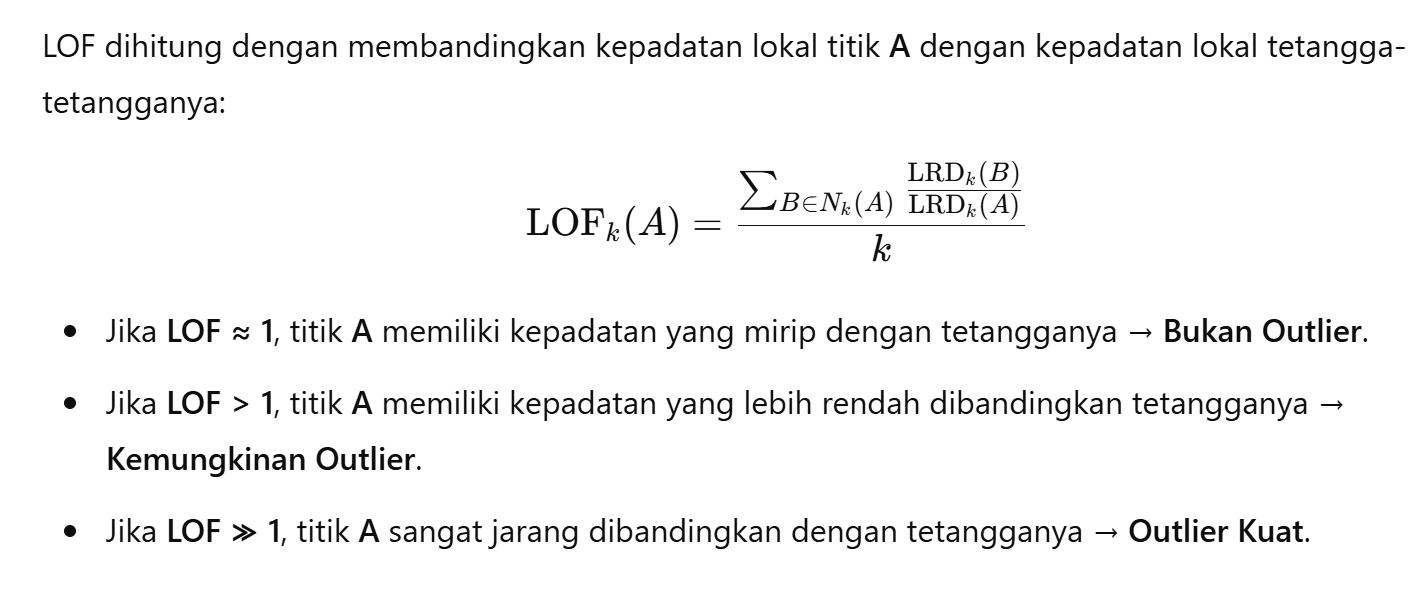
*   LOF score dihitung sebagai rasio kepadatan lokal titik tertentu dibandingkan dengan kepadatan lokal tetangga-tetangganya.
*   Jika LOF score ≈ 1, berarti titik tersebut memiliki kepadatan yang mirip dengan tetangganya (bukan outlier).
*   Jika LOF score ≫ 1, berarti titik tersebut memiliki kepadatan yang jauh lebih rendah dibandingkan dengan tetangganya, sehingga dianggap sebagai outlier.








# **Implementasi LOF Pada Perhitungan Manual dan Program**

Menggunakan Excel

**Contoh Data**
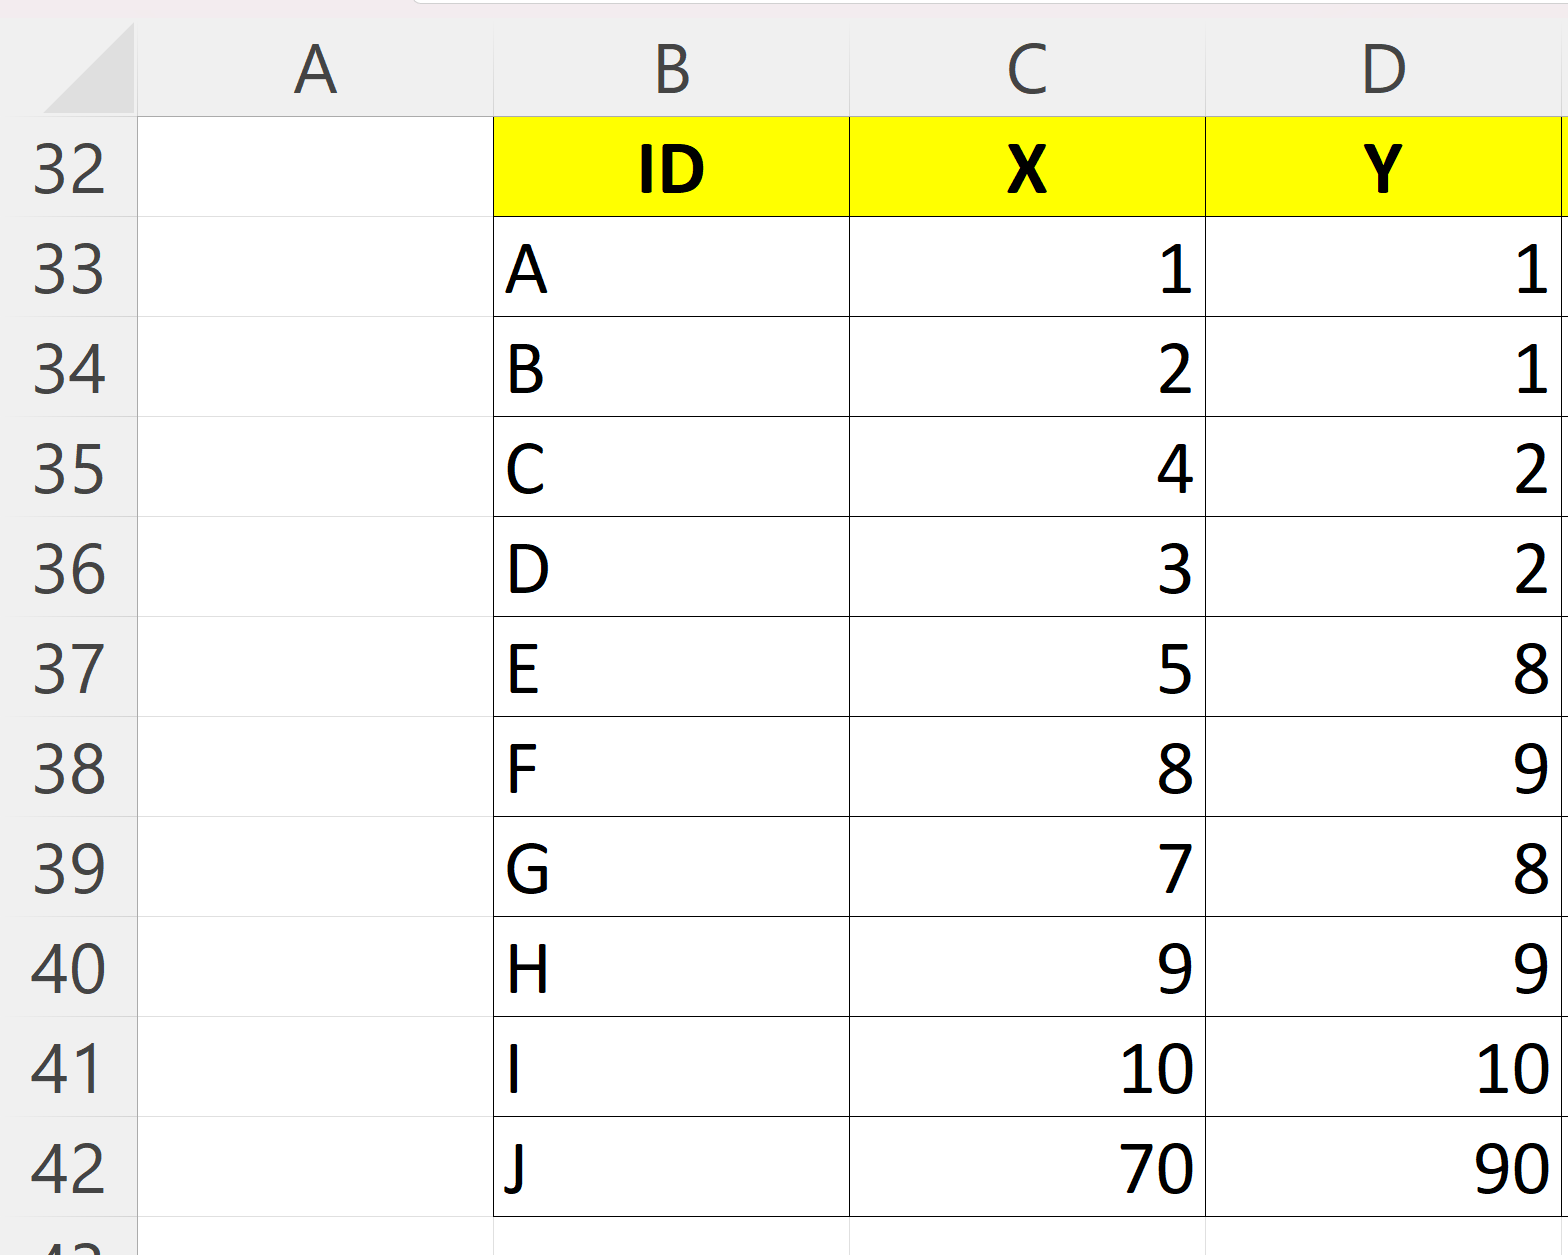


## Langkah 1 Hitung Jarak Euclidean antara Titik-Titik

**Rumus Euclidean Distance**

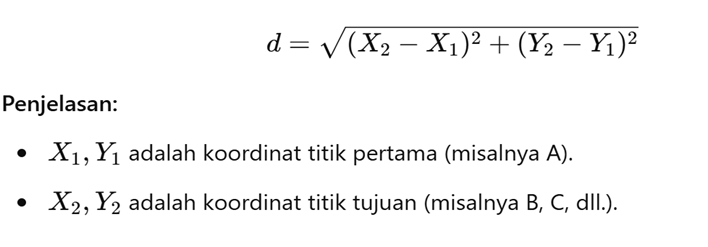

**Rumus Ecxel menghitung Euclidean Distance**

Note : sesuaikan dengan baris yang ada di excel anda x1 adalah titik yang sedang dicari saat ini, maka tidak berubah yang berubah adalah x2
*   A ke semua ID : = SQRT(($C33-$C$33)^2 + ($D33-$D$33)^2)
*   B ke semua ID : =SQRT(($C33-$C$34)^2 + ($D33-$D$34)^2)
*    C ke semua ID : =SQRT(($C33-$C$35)^2 + ($D33-$D$35)^2)
*    D ke semua ID : =SQRT(($C33-$C$36)^2 + ($D33-$D$65)^2)
*  E ke semua ID : =SQRT(($C33-$C$37)^2 + ($D33-$D$37)^2)
*  F ke semua ID : =SQRT(($C33-$C$38)^2 + ($D33-$D$38)^2)
* G ke semua ID : =SQRT(($C33-$C$39)^2 + ($D33-$D$39)^2)
*  H ke semua ID : =SQRT(($C33-$C$40)^2 + ($D33-$D$40)^2)
*  I ke semua ID : =SQRT(($C33-$C$41)^2 + ($D33-$D$41)^2)
*  J ke semua ID : =SQRT(($C33-$C$42)^2 + ($D33-$D$42)^2)

drag dari A sampai ke J setiap kali memasukkan rumus sehingga terhitung otomatis sampai J


**Hasil Perhitungan Eclidean Distance**
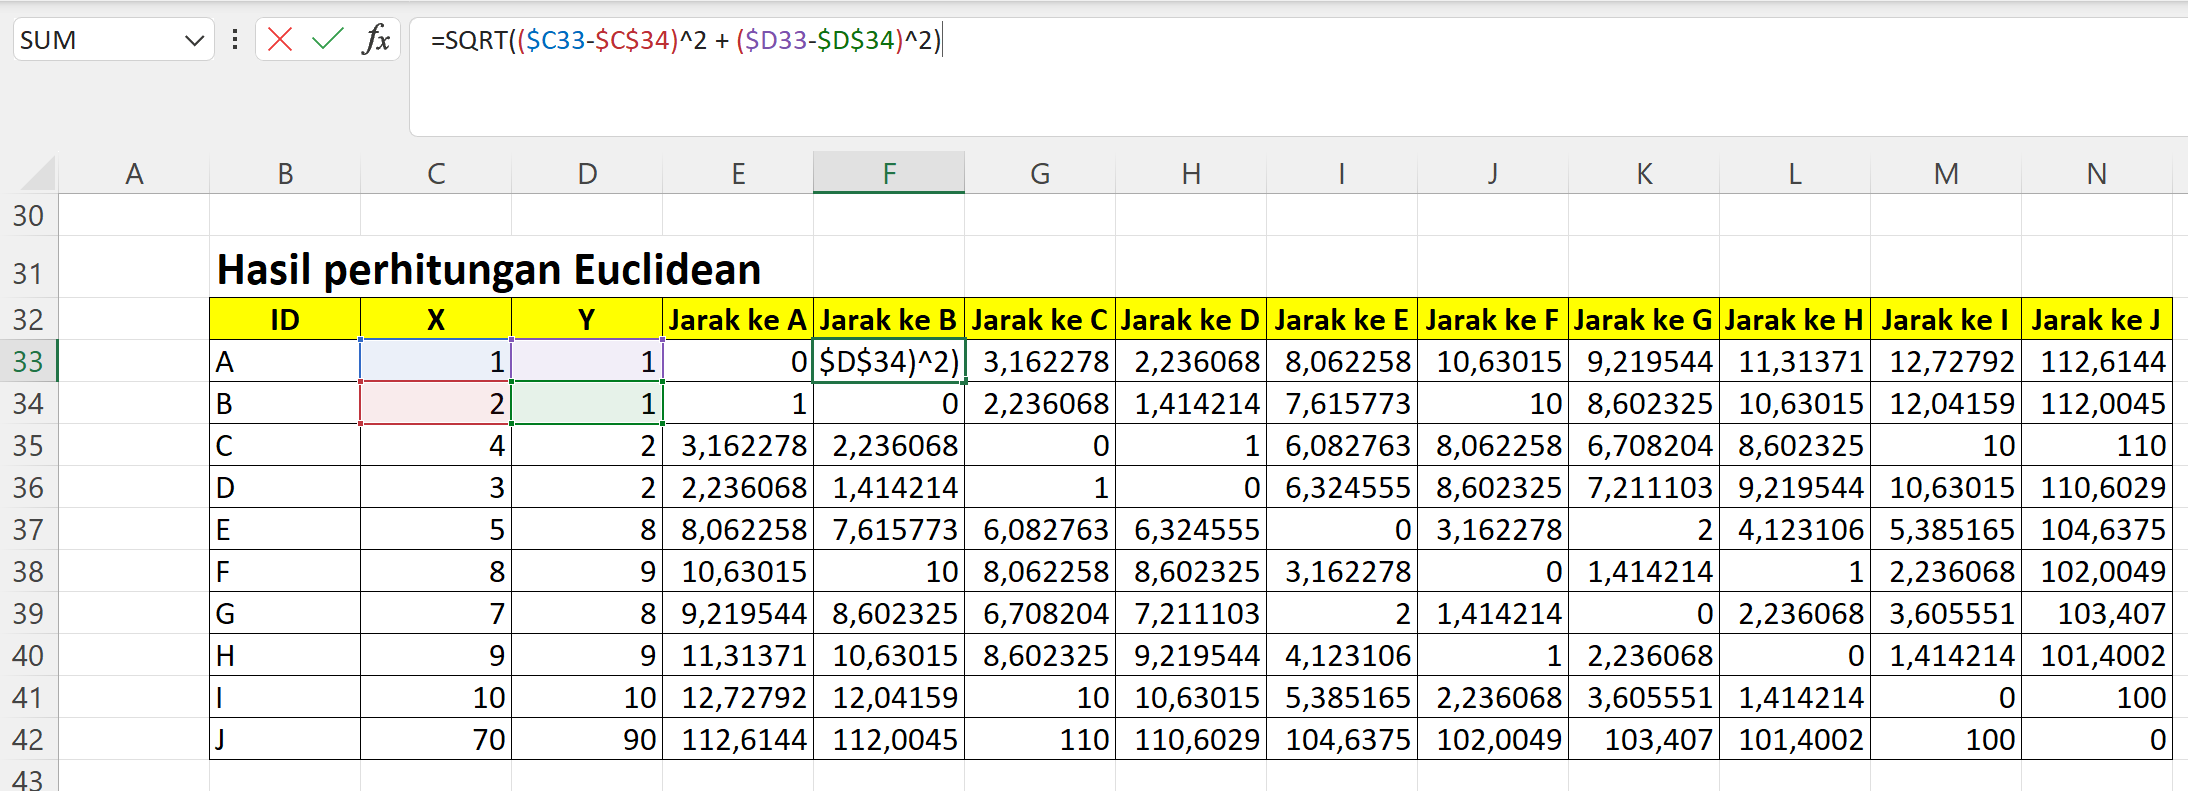

In [ ]:
# Implementasi Program
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import NearestNeighbors

# Data titik (X, Y)
data = np.array([
    [1, 1], [2, 1], [4, 2], [3, 2], [5, 8],
    [8, 9], [7, 8], [9, 9], [10, 10], [70, 90]
])

# Membuat label untuk titik (A, B, C, ...)
labels = [chr(65 + i) for i in range(len(data))]  # A, B, C, D, ...

In [ ]:
# 1. Menghitung Jarak Euclidean
distance_matrix = euclidean_distances(data, data)

# Konversi ke DataFrame untuk tampilan rapi
df_distance = pd.DataFrame(distance_matrix, index=labels, columns=labels)
print("\n=== Jarak Euclidean ===")
print(df_distance.round(4))  # Menampilkan 4 desimal


=== Jarak Euclidean ===
          A         B         C         D         E         F         G  \
A    0.0000    1.0000    3.1623    2.2361    8.0623   10.6301    9.2195   
B    1.0000    0.0000    2.2361    1.4142    7.6158   10.0000    8.6023   
C    3.1623    2.2361    0.0000    1.0000    6.0828    8.0623    6.7082   
D    2.2361    1.4142    1.0000    0.0000    6.3246    8.6023    7.2111   
E    8.0623    7.6158    6.0828    6.3246    0.0000    3.1623    2.0000   
F   10.6301   10.0000    8.0623    8.6023    3.1623    0.0000    1.4142   
G    9.2195    8.6023    6.7082    7.2111    2.0000    1.4142    0.0000   
H   11.3137   10.6301    8.6023    9.2195    4.1231    1.0000    2.2361   
I   12.7279   12.0416   10.0000   10.6301    5.3852    2.2361    3.6056   
J  112.6144  112.0045  110.0000  110.6029  104.6375  102.0049  103.4070   

          H         I         J  
A   11.3137   12.7279  112.6144  
B   10.6301   12.0416  112.0045  
C    8.6023   10.0000  110.0000  
D    9.2195  

## Langkah 2 Menentukan K-Distance

**untuk K = 3**
Jika K = 3, maka K-Distance adalah peringkat ke-4 dalam daftar jarak Euclidean.

**1.   Menemukan 3 Jarak Terdekat untuk Setiap Titik**
Gunakan fungsi Excel berikut untuk menemukan 3 jarak terkecil (terkecil setelah 0, karena jarak ke diri sendiri selalu 0):

Misalkan jarak untuk titik A ada di sel E34:N34, gunakan formula ini di O34 untuk menemukan :

1.   jarak terkecil kedua: =SMALL(E33:N33,2)
2.   jarak terkecil ketiga :=SMALL(E33:N33,3)
3. jarak terkecil keempat :=SMALL(E33:N33,4)

Salin rumus ini ke bawah untuk setiap titik lainnya.

**2.   Menemukan ID Tetangga Terdekat**
Misalkan ID dari setiap titik ada di kolom B (B33:B42), gunakan formula INDEX + MATCH untuk menemukan ID tetangga pertama:

1. Tetangga pertama (jarak terkecil kedua) : =INDEX($B$33:$B$42, MATCH(SMALL(E33:N33,2), E33:N33, 0))
2. Tetangga kedua (jarak terkecil ketiga) : =INDEX($B$33:$B$42, MATCH(SMALL(E33:N33,3), E33:N33, 0))
3. Tetangga ketiga (jarak terkecil keempat) : =INDEX($B$33:$B$42, MATCH(SMALL(E33:N33,4), E33:N33, 0))

Catatan:
*   $B$33:$B$42 adalah rentang ID.
*   E33:N33 adalah rentang jarak untuk titik A
*   Gunakan tanda $ agar rentang tetap saat rumus disalin ke bawah.

**Hasil Perhitungan**
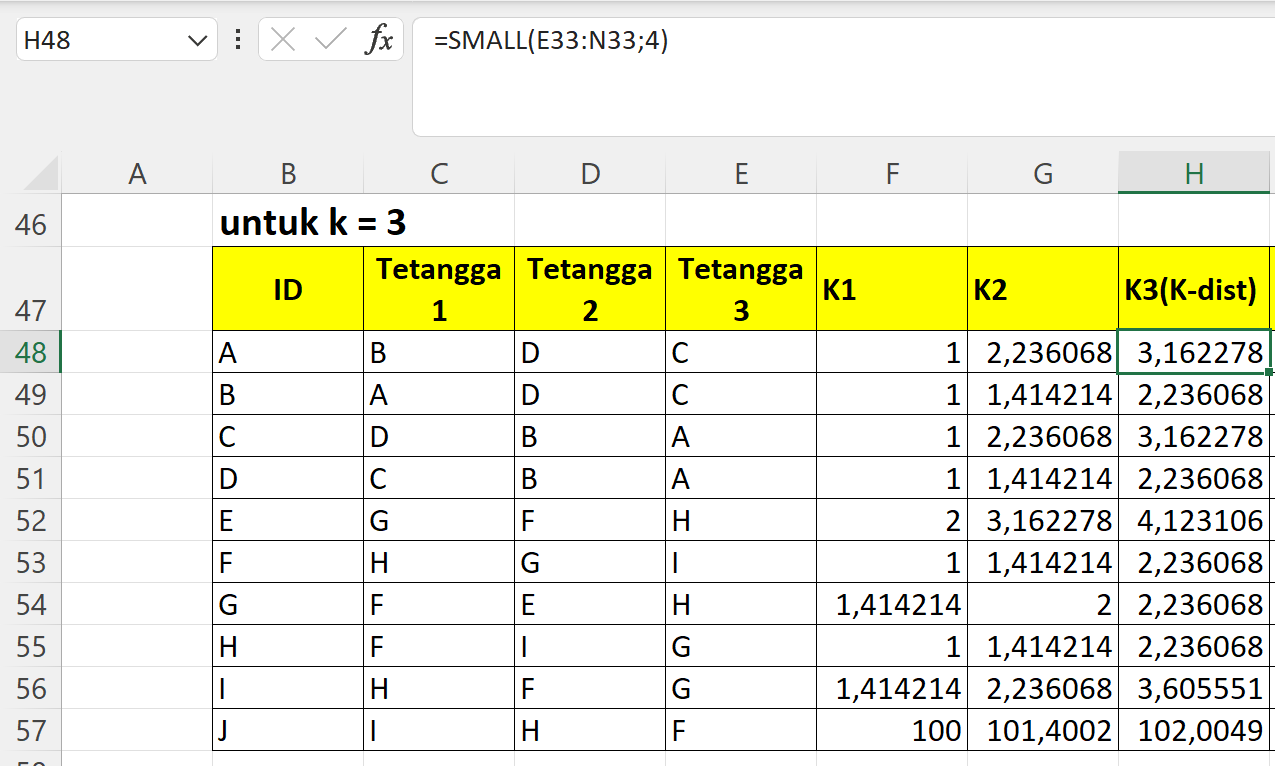







In [ ]:
# Implementasi Program
# 2. Menentukan k-Distance untuk k=3
k = 3
nbrs = NearestNeighbors(n_neighbors=k+1, metric='euclidean').fit(data)  # +1 untuk mengabaikan diri sendiri
distances, indices = nbrs.kneighbors(data)

# Hapus elemen pertama (diri sendiri)
final_indices = indices[:, 1:]
final_distances = distances[:, 1:]

# Ambil nilai k-Distance sebagai jarak terjauh dari tetangga ke-3
k_distance = final_distances[:, -1]

# Menyimpan tetangga dalam tabel rapi
df_k_distance = pd.DataFrame({
    "ID": labels,
    "Tetangga 1": [labels[i] for i in final_indices[:, 0]],
    "Tetangga 2": [labels[i] for i in final_indices[:, 1]],
    "Tetangga 3": [labels[i] for i in final_indices[:, 2]],
    "K-Distance": k_distance.round(4)
})
print("\n=== k-Distance (k=3) ===")
print(df_k_distance)



=== k-Distance (k=3) ===
  ID Tetangga 1 Tetangga 2 Tetangga 3  K-Distance
0  A          B          D          C      3.1623
1  B          A          D          C      2.2361
2  C          D          B          A      3.1623
3  D          C          B          A      2.2361
4  E          G          F          H      4.1231
5  F          H          G          I      2.2361
6  G          F          E          H      2.2361
7  H          F          I          G      2.2361
8  I          H          F          G      3.6056
9  J          I          H          F    102.0049


## Langkah 3 Hitung Reachability Distance (RD)
**Rumus RD**
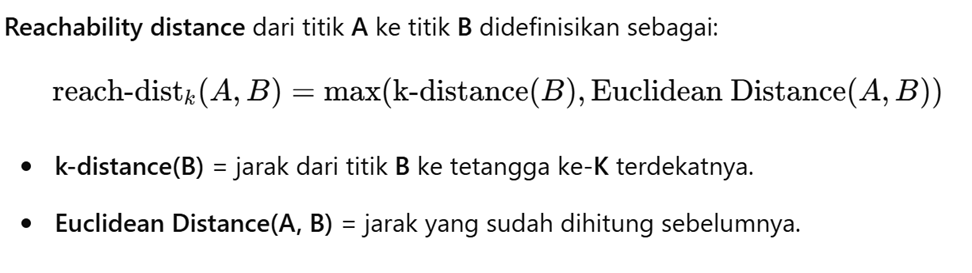



**Penjelasan:**


*   RD dihitung dari Max(k-distance masing-masing ID,jarak ID ke tetangga)
*   Misalkan K-distance A adalah 3,162278 lalu jarak ID A ke tetangga 1 yaitu B adalah 1 maka menjadi MAx((3,162278),1) = 3,162278.
*   Lalu hitung ke semua tetangga ID (Tetangga 2,Tetangga 3)

**Hasil Perhitungan RD**
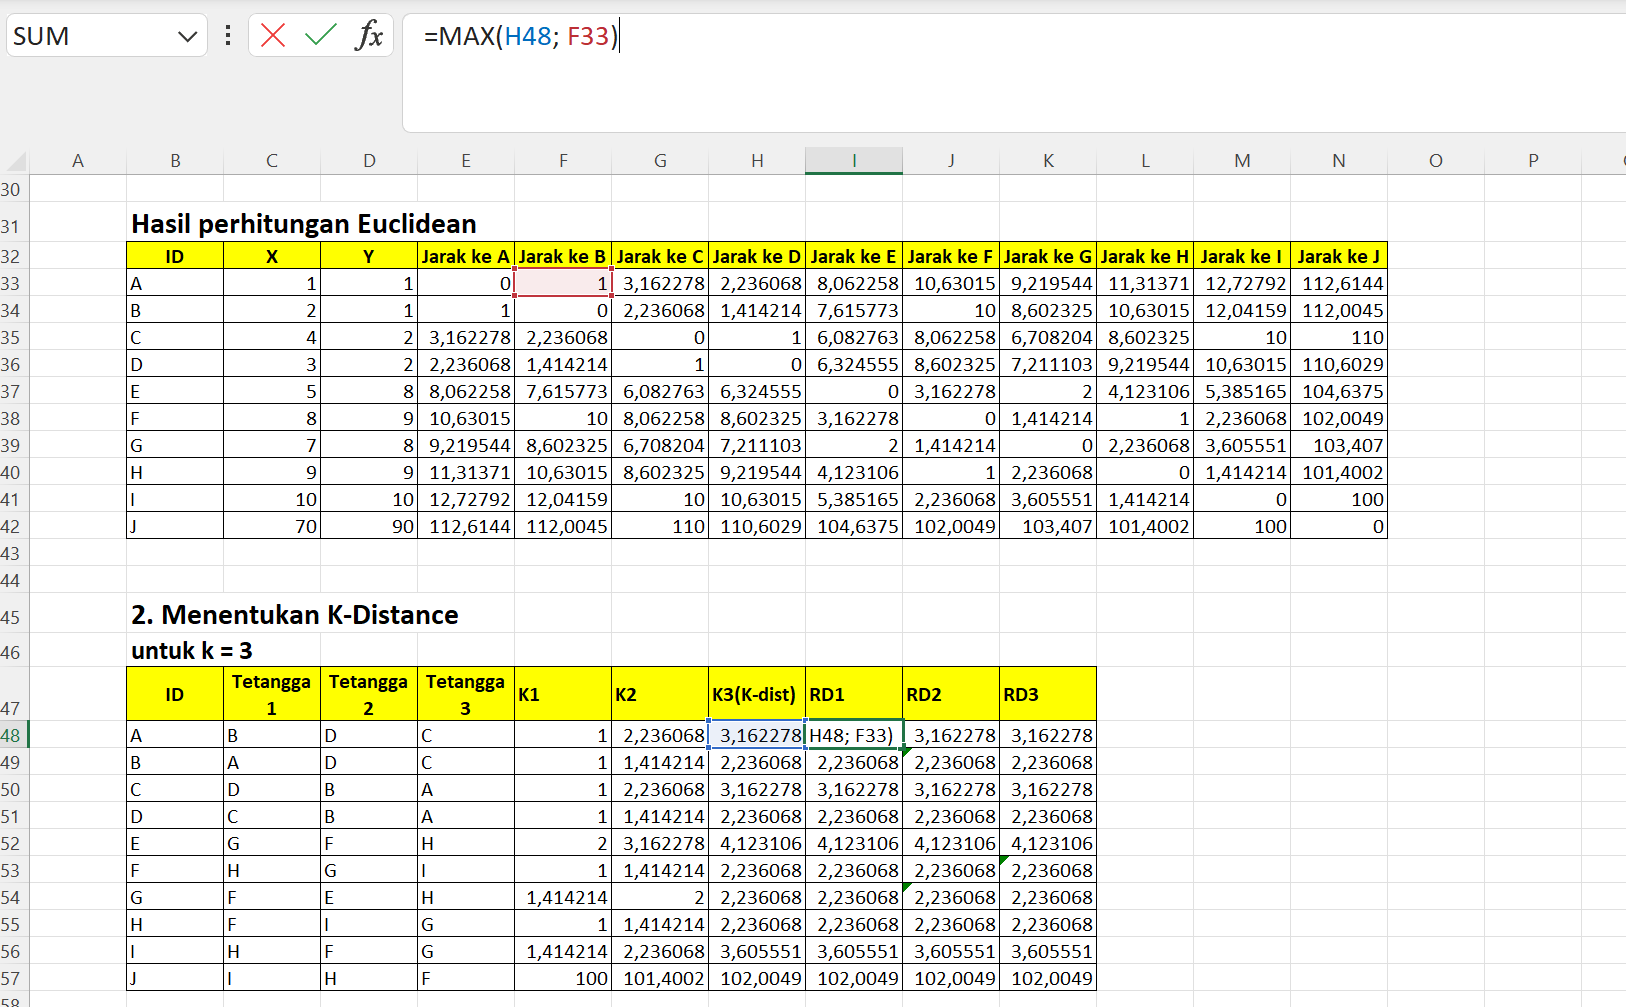







In [ ]:
# Implementasi Program
# 3. Menghitung Reachability Distance (RD)
def reachability_distance(k_distance, distance_matrix, final_indices):
    rd_matrix = np.zeros_like(distance_matrix)
    for i in range(len(distance_matrix)):
        for j_idx, j in enumerate(final_indices[i]):  # Hanya tetangga yang dipertimbangkan
            rd_matrix[i, j] = max(k_distance[i], distance_matrix[i, j])  # Menggunakan k-Distance(A)
    return rd_matrix

rd_matrix = reachability_distance(k_distance, distance_matrix, final_indices)

# Konversi RD ke DataFrame
df_rd = pd.DataFrame(rd_matrix, index=labels, columns=labels)
print("\n=== Reachability Distance (RD) ===")
print(df_rd.round(4))



=== Reachability Distance (RD) ===
        A       B       C       D       E         F       G         H  \
A  0.0000  3.1623  3.1623  3.1623  0.0000    0.0000  0.0000    0.0000   
B  2.2361  0.0000  2.2361  2.2361  0.0000    0.0000  0.0000    0.0000   
C  3.1623  3.1623  0.0000  3.1623  0.0000    0.0000  0.0000    0.0000   
D  2.2361  2.2361  2.2361  0.0000  0.0000    0.0000  0.0000    0.0000   
E  0.0000  0.0000  0.0000  0.0000  0.0000    4.1231  4.1231    4.1231   
F  0.0000  0.0000  0.0000  0.0000  0.0000    0.0000  2.2361    2.2361   
G  0.0000  0.0000  0.0000  0.0000  2.2361    2.2361  0.0000    2.2361   
H  0.0000  0.0000  0.0000  0.0000  0.0000    2.2361  2.2361    0.0000   
I  0.0000  0.0000  0.0000  0.0000  0.0000    3.6056  3.6056    3.6056   
J  0.0000  0.0000  0.0000  0.0000  0.0000  102.0049  0.0000  102.0049   

          I    J  
A    0.0000  0.0  
B    0.0000  0.0  
C    0.0000  0.0  
D    0.0000  0.0  
E    0.0000  0.0  
F    2.2361  0.0  
G    0.0000  0.0  
H    2.2

## Langkah 4 Menghitung LRD
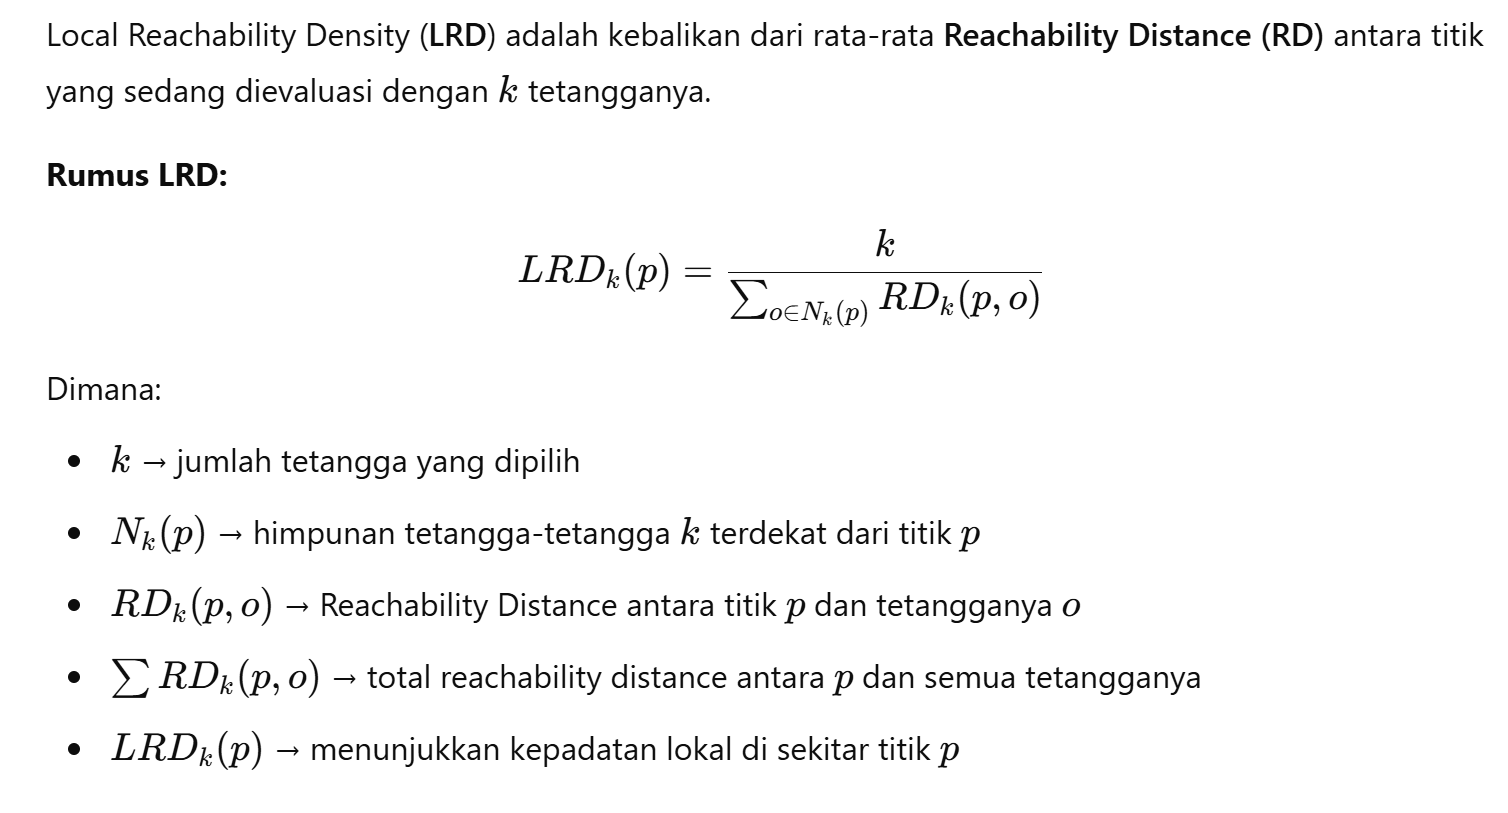


**Penjelasan**

Misalkan kita ingin menghitung LRD A :


*   k=3
*   RD dari tetangga terdekat yaitu RD1,RD2,RD3
*   lalu jika sesuai dengan rumus maka 3 / (RD1+RD2+RD3)
*   sesuaikan dengan menggunakan excel misal jika LRD ada di kolom I,J,dan K maka rumus excel = 3 / (I48 + J48 + K48),drag rumus sampai bawah agar LRD terhitung otomatis.

**Hasil Perhitungan LRD**
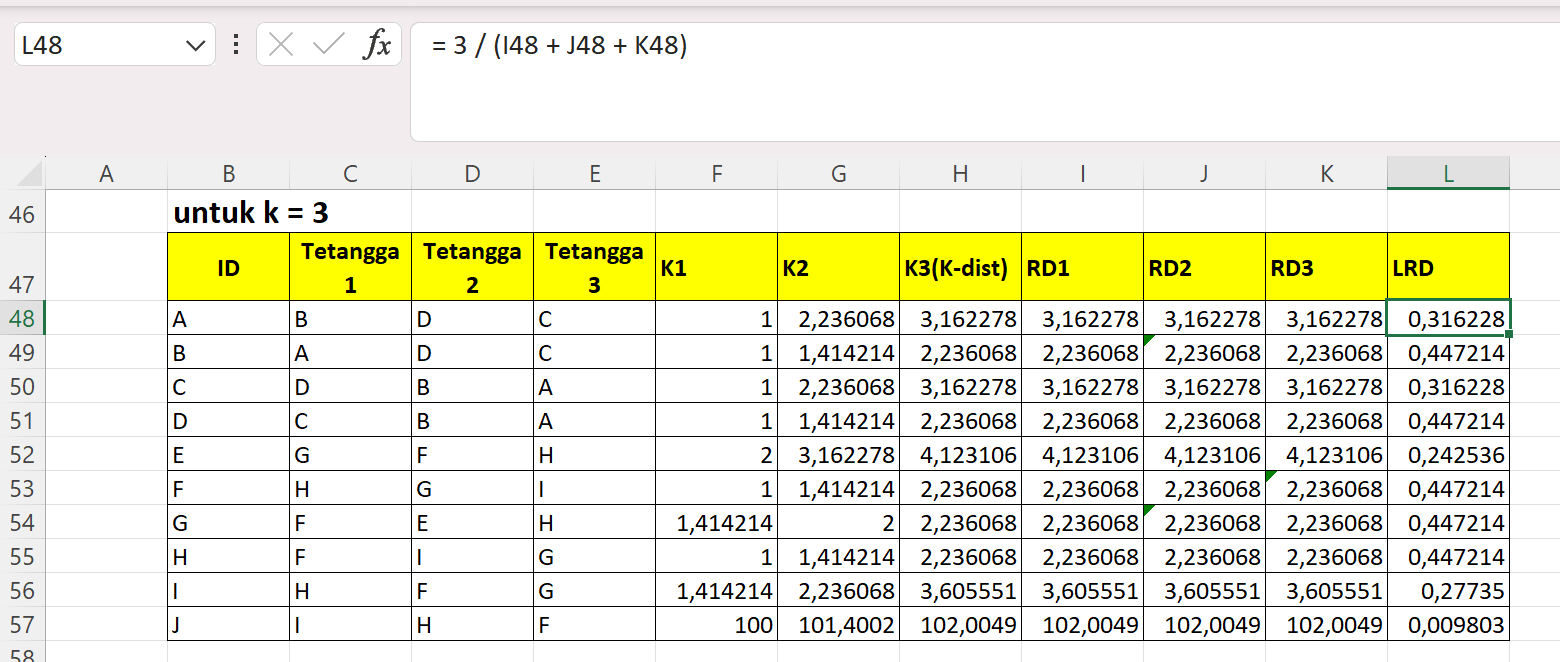





In [ ]:
# implementasi program
# 4. Menghitung Local Reachability Density (LRD)
def local_reachability_density(final_indices, rd_matrix):
    lrd = np.zeros(len(final_indices))
    for i in range(len(final_indices)):
        reach_dists = [rd_matrix[i, j] for j in final_indices[i]]
        lrd[i] = k / sum(reach_dists) if sum(reach_dists) > 0 else 0  # Hindari pembagian dengan nol
    return lrd

lrd_values = local_reachability_density(final_indices, rd_matrix)

# Konversi LRD ke DataFrame
df_lrd = pd.DataFrame({"ID": labels, "LRD": lrd_values.round(4)})
print("\n=== Local Reachability Density (LRD) ===")
print(df_lrd)



=== Local Reachability Density (LRD) ===
  ID     LRD
0  A  0.3162
1  B  0.4472
2  C  0.3162
3  D  0.4472
4  E  0.2425
5  F  0.4472
6  G  0.4472
7  H  0.4472
8  I  0.2774
9  J  0.0098


## Langkah 5 Menghitung LOF
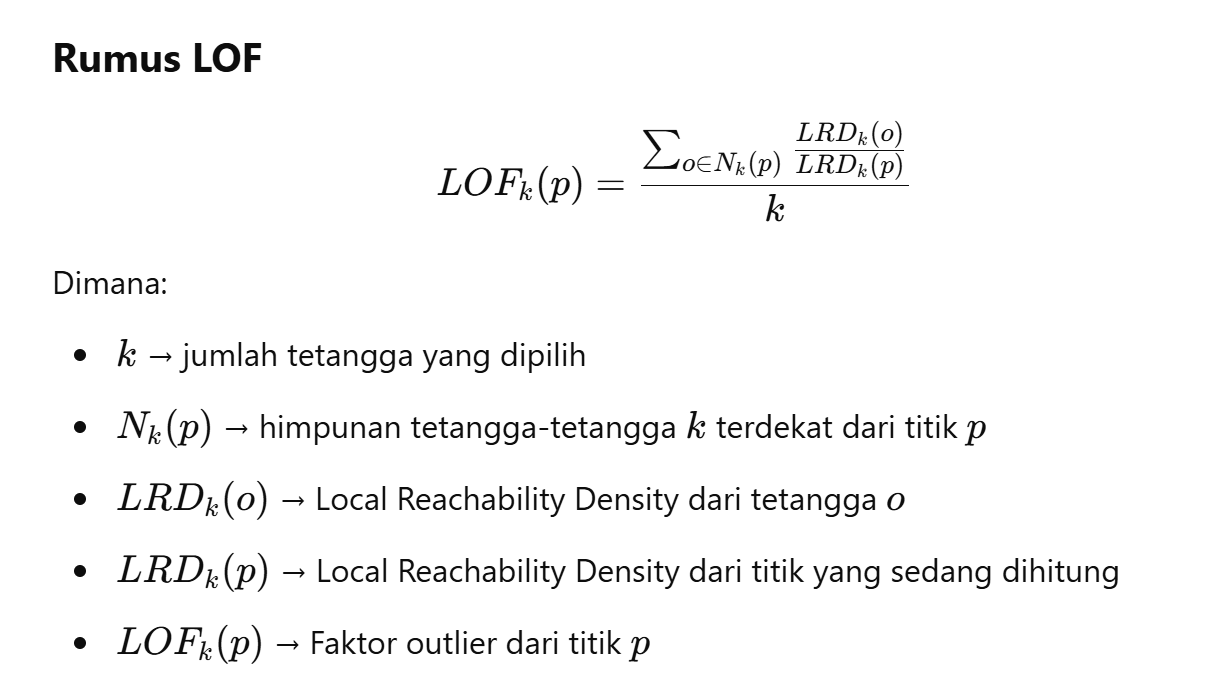

**Penjelasan**

misalkan kita akan menghitung LOF A :
*  k = 3
*  himpunan tetangga terdekat A adalah B,D,C
* LRD(o) = LRD tetangga A adalah LRD ID B,LRD ID D, dan LRD ID C
*   LRD(p) = LRD A(LRD ID yang sedang dihitung)
*   jadi jika sesuai rumus (LRDB/LRDA + LRDD/LRDA + LRDC/LRDA)/3
*   hitung pada excel sesuaikan kolom dan baris tetangga masing-masing ID

**Hasil Perhitungan LOF**
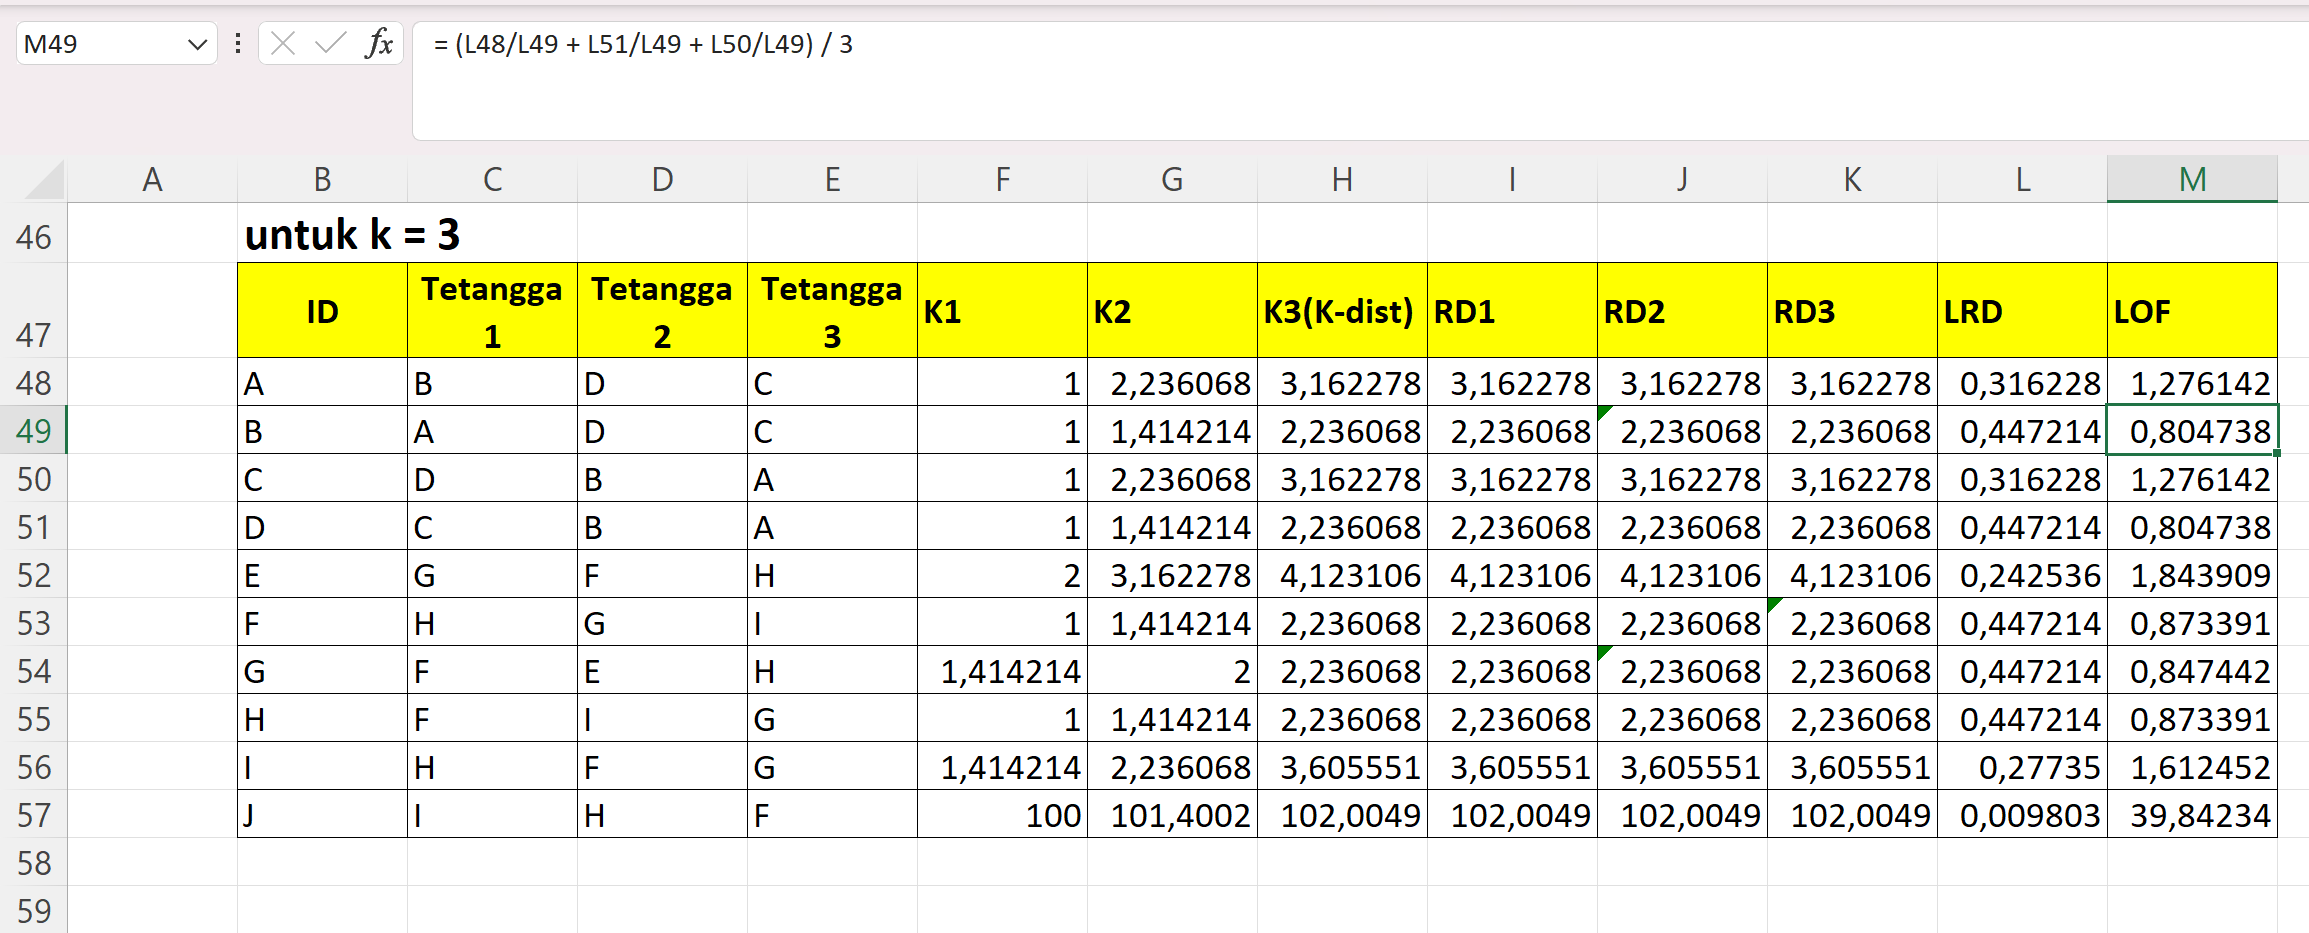
**Bagaimana menentukan Outlier?**
1. Jika LOF ≈ 1 → Titik dianggap normal (bukan outlier).
2. Jika LOF > 1.2 → Titik kemungkinan outlier.
3. Jika LOF ≫ 1.5 → Titik adalah outlier kuat (highly likely an outlier).
4. Semakin besar LOF, semakin besar kemungkinan titik tersebut adalah outlier.







In [ ]:
# 5. Menghitung Local Outlier Factor (LOF)
def local_outlier_factor(final_indices, lrd_values):
    lof = np.zeros(len(final_indices))
    for i in range(len(final_indices)):
        neighbor_lrd_sum = sum(lrd_values[j] for j in final_indices[i])
        lof[i] = (neighbor_lrd_sum / (k * lrd_values[i])) if lrd_values[i] > 0 else 0  # Hindari pembagian dengan nol
    return lof

lof_values = local_outlier_factor(final_indices, lrd_values)

# Konversi LOF ke DataFrame
df_lof = pd.DataFrame({"ID": labels, "LOF": lof_values.round(4)})
print("\n=== Local Outlier Factor (LOF) ===")
print(df_lof)


=== Local Outlier Factor (LOF) ===
  ID      LOF
0  A   1.2761
1  B   0.8047
2  C   1.2761
3  D   0.8047
4  E   1.8439
5  F   0.8734
6  G   0.8474
7  H   0.8734
8  I   1.6125
9  J  39.8423


In [ ]:
# 6. Menentukan status outlier berdasarkan LOF
def classify_lof(lof_value):
    if lof_value <= 1.5:
        return "Normal"
    elif lof_value > 1.5 and lof_value <= 2:
        return "Possible Outlier"
    else:
        return "Outlier"

outlier_status = [classify_lof(lof) for lof in lof_values]

df_lof = pd.DataFrame({
    "ID": labels,
    "LOF": lof_values.round(4),
    "Status": outlier_status
})

print("\n=== Local Outlier Factor (LOF) ===")
print(df_lof)


=== Local Outlier Factor (LOF) ===
  ID      LOF            Status
0  A   1.2761            Normal
1  B   0.8047            Normal
2  C   1.2761            Normal
3  D   0.8047            Normal
4  E   1.8439  Possible Outlier
5  F   0.8734            Normal
6  G   0.8474            Normal
7  H   0.8734            Normal
8  I   1.6125  Possible Outlier
9  J  39.8423           Outlier


# Visualisasi LOF

In [ ]:
# 6. Menentukan label outlier berdasarkan LOF
def classify_lof(lof_value):
    if lof_value <= 1.5:
        return 1  # Normal
    else:
        return -1  # Outlier

outlier_labels = [classify_lof(lof) for lof in lof_values]

df_lof = pd.DataFrame({
    "ID": labels,
    "LOF": lof_values.round(4),
    "Outlier_Label": outlier_labels
})

print("\n=== Local Outlier Factor (LOF) ===")
print(df_lof)



=== Local Outlier Factor (LOF) ===
  ID      LOF  Outlier_Label
0  A   1.2761              1
1  B   0.8047              1
2  C   1.2761              1
3  D   0.8047              1
4  E   1.8439             -1
5  F   0.8734              1
6  G   0.8474              1
7  H   0.8734              1
8  I   1.6125             -1
9  J  39.8423             -1


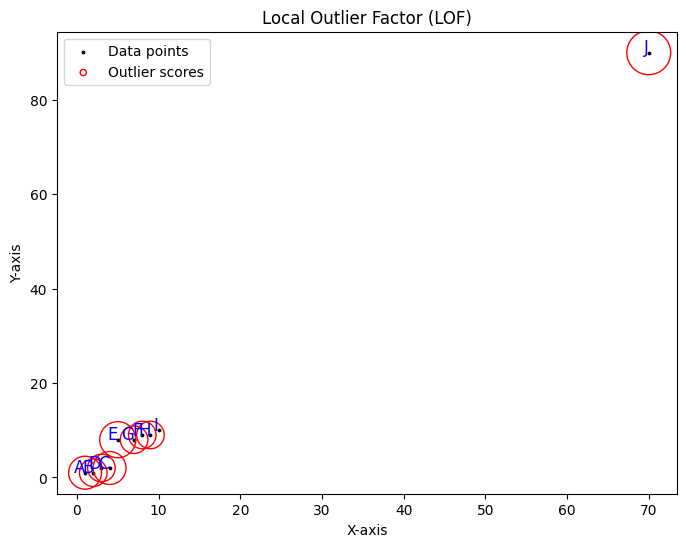

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPathCollection
# 8. Visualisasi Data dan Outlier Scores
def update_legend_marker_size(handle, orig):
    """Menyesuaikan ukuran legend marker"""
    handle.update_from(orig)
    handle.set_sizes([20])

plt.figure(figsize=(8, 6))

# Plot titik data
plt.scatter(data[:, 0], data[:, 1], color="k", s=3.0, label="Data points")

# Plot lingkaran dengan radius sesuai outlier score
radius = (lof_values.max() - lof_values) / (lof_values.max() - lof_values.min())
scatter = plt.scatter(
    data[:, 0],
    data[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)

# Menampilkan label pada setiap titik
for i, txt in enumerate(labels):
    plt.annotate(txt, (data[i, 0], data[i, 1]), fontsize=12, color="blue", ha='right')

plt.axis("tight")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend(handler_map={scatter: HandlerPathCollection(update_func=update_legend_marker_size)})
plt.title("Local Outlier Factor (LOF)")
plt.show()